# **Wrangle and Analyze Data (WeRateDogs)**

### by Amal Aljabri

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering Data</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#analyzing_visualizing">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
<br/>
<br/>
The entirety of this project was implemented using Python language, Pandas, Matplotlib, 
Seaborn, Requests, Tweepy, Json, and NumPy.


### The Data
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
%matplotlib inline

c:\users\urt54\appdata\local\programs\python\python37\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


<a id='gathering'></a>
## Gathering Data

### Gather data from a variety of sources and file formats.

In [2]:
#Read Twitter archive CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
#Download image predictions TSV file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [4]:
#Read image predictions TSV file
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [ ]:
# Getting tweet data from Twitter API
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [6]:
df_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [7]:
tweet_data = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])
tweet_data = tweet_data.rename(columns = {'id':'tweet_id'})
tweet_data.to_csv('tweet_data.csv', index = False) 
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [8]:
#Read Tweet Data CSV file 
tweet_data = pd.read_csv('tweet_data.csv')
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


<a id='assessing'></a>
## Assessing Data

### Assess data visually and programmatically for quality and tidiness.
### Two types of assessment:
- **Visual assessment:** scrolling through the data in your preferred software application (Google Sheets, Excel, a text editor, etc.).
- **Programmatic assessment:** using code to view specific portions and summaries of the data (pandas' head, tail, and info methods, for example).

**At least eight (8) data quality issues and two (2) tidiness issues are detected.**

- Quality: issues with content. Low quality data is also known as dirty data.
- Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:
    1. Each variable forms a column.
    2. Each observation forms a row.
    3. Each type of observational unit forms a table.

### Assessing Enhanced Twitter Archive Data

In [9]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [12]:
# checking count rating_numerator less than 10
twitter_archive[twitter_archive['rating_numerator'] < 10].count()[0]

440

In [13]:
# checking which tweet_id have rating_numerator less than 10
twitter_archive[twitter_archive['rating_numerator'] < 10]['tweet_id']

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [14]:
# checking rating_numerator of tweet_id is 666049248165822465
twitter_archive.loc[(twitter_archive['tweet_id'] == 666049248165822465),'rating_numerator']

2351    5
Name: rating_numerator, dtype: int64

In [15]:
# checking text of tweet id is 666049248165822465
twitter_archive.loc[2351 , 'text']

'Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq'

In [16]:
twitter_archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [17]:
# checking which tweet_id have rating_denominator equal 0
twitter_archive[twitter_archive['rating_denominator'] == 0]['tweet_id']

313    835246439529840640
Name: tweet_id, dtype: int64

In [18]:
# checking text of tweet id is 835246439529840640
twitter_archive.loc[313 , 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [19]:
# checking count rating_denominator not equal 10
twitter_archive[twitter_archive['rating_denominator'] != 10].count()[0]

23

In [20]:
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Laika        1
Arya         1
Augie        1
Kaiya        1
Lorelei      1
Name: name, Length: 957, dtype: int64

### Assessing Image Predictions Data

In [21]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Assessing Tweet Data From API

In [23]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [24]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Tidiness Issues
- doggo, floofer, pepper, and puppo columns should be one column (merge columns).
- twitter_archive, image_predictions, and tweet_data Dataframes should be part of one Dataframe (merge dataframes).

### Quality Issues 
- Delete retweets by filtering the NaN of retweeted_status_user_id.
- Delete in_reply_to_status_id, retweeted_status_id, in_reply_to_user_id retweeted_status_user_id, retweeted_status_timestamp columns.
- Correcting data type in tweet_id (from int into string).
- Correcting data type in timestamp (from string into datetime).
- Delete rows with jpg_url have missing.
- Create 1 column for dog image prediction and 1 column for dog image prediction confidence.
- Delete p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, img_num columns.
- Convert underscore to space and convert lowercase to uppercase in prediction_dog.


<a id='cleaning'></a>
## Cleaning Data

In [25]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

In [26]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [27]:
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [28]:
tweet_data_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


### Cleaning Tidiness Issues
### Tidiness Issue_1

### Define
- doggo, floofer, pupper, and puppo columns should be one column (merge columns).

### Code

In [29]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_archive_clean = twitter_archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'] )

### Test

In [30]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


In [31]:
twitter_archive_clean['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

### Tidiness Issue_2
### Define
- twitter_archive, image_predictions, and tweet_data Dataframes should be part of one Dataframe (merge dataframes).

### Code

In [32]:
df_clean = pd.merge(twitter_archive_clean, tweet_data_clean, on='tweet_id', how='left')
df_clean = pd.merge(df_clean, image_predictions_clean, on='tweet_id', how='left')

### Test

In [33]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

### Cleaning Quality Issues
### Quality Issue_1

### Define
- Delete retweets by filtering the NaN of retweeted_status_user_id.

### Code

In [35]:
df_clean = df_clean[pd.isnull(df_clean['retweeted_status_user_id'])]

### Test

In [36]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   364 n

### Quality Issue_2

### Define
- Delete in_reply_to_status_id, retweeted_status_id, in_reply_to_user_id retweeted_status_user_id, retweeted_status_timestamp columns.

### Code

In [38]:
df_clean = df_clean.drop(columns = ['in_reply_to_status_id', 
                                    'in_reply_to_user_id', 
                                    'retweeted_status_id', 
                                    'retweeted_status_user_id', 
                                    'retweeted_status_timestamp'])

### Test

In [39]:
df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   int64  
 6   rating_denominator  2175 non-null   int64  
 7   name                2175 non-null   object 
 8   dog_stage           364 non-null    object 
 9   retweet_count       2175 non-null   float64
 10  favorite_count      2175 non-null   float64
 11  jpg_url             1994 non-null   object 
 12  img_num             1994 non-null   float64
 13  p1                  1994 non-null   object 
 14  p1_conf             1994 non-null   float64
 15  p1_dog              1994 non-null   object 
 16  p2    

### Quality Issue_3

### Define
- Correcting data type in tweet_id (from int into string).

### Code

In [41]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

### Test

In [42]:
df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   object 
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   int64  
 6   rating_denominator  2175 non-null   int64  
 7   name                2175 non-null   object 
 8   dog_stage           364 non-null    object 
 9   retweet_count       2175 non-null   float64
 10  favorite_count      2175 non-null   float64
 11  jpg_url             1994 non-null   object 
 12  img_num             1994 non-null   float64
 13  p1                  1994 non-null   object 
 14  p1_conf             1994 non-null   float64
 15  p1_dog              1994 non-null   object 
 16  p2    

### Quality Issue_4

### Define
- Correcting data type in timestamp (from string into datetime).

### Code

In [44]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'] )

### Test

In [45]:
df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   dog_stage           364 non-null    object             
 9   retweet_count       2175 non-null   float64            
 10  favorite_count      2175 non-null   float64            
 11  jpg_url             1994 non-null   object             
 12  img_num             1994 non-null 

### Quality Issue_5

### Define
- Delete rows with jpg_url have missing.

### Code

In [47]:
df_clean = df_clean[df_clean['jpg_url'].notnull()]

### Test

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   dog_stage           326 non-null    object             
 9   retweet_count       1994 non-null   float64            
 10  favorite_count      1994 non-null   float64            
 11  jpg_url             1994 non-null   object             
 12  img_num             1994 non-null 

### Quality Issue_6

### Define
- Create 1 column for dog image prediction and 1 column for dog image prediction confidence.

### Code

In [49]:
prediction_dog = []
prediction_dog_confidence = []

def dog_image(df_clean):
    if df_clean['p1_dog'] == True:
        prediction_dog.append(df_clean['p1'])
        prediction_dog_confidence.append(df_clean['p1_conf'])
    elif df_clean['p2_dog'] == True:
        prediction_dog.append(df_clean['p2'])
        prediction_dog_confidence.append(df_clean['p2_conf'])
    elif df_clean['p3_dog'] == True:
        prediction_dog.append(df_clean['p3'])
        prediction_dog_confidence.append(df_clean['p3_conf'])
    else:
        prediction_dog.append('Error')
        prediction_dog_confidence.append('Error')
    
df_clean.apply(dog_image, axis=1)

df_clean['prediction_dog'] = prediction_dog
df_clean['prediction_dog_confidence'] = prediction_dog_confidence
df_clean = df_clean[df_clean['prediction_dog'] != 'Error']

### Test

In [50]:
df_clean.head(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction_dog,prediction_dog_confidence
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712


In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   tweet_id                   1686 non-null   object             
 1   timestamp                  1686 non-null   datetime64[ns, UTC]
 2   source                     1686 non-null   object             
 3   text                       1686 non-null   object             
 4   expanded_urls              1686 non-null   object             
 5   rating_numerator           1686 non-null   int64              
 6   rating_denominator         1686 non-null   int64              
 7   name                       1686 non-null   object             
 8   dog_stage                  274 non-null    object             
 9   retweet_count              1686 non-null   float64            
 10  favorite_count             1686 non-null   float64            
 11  jpg_

### Quality Issue_7

### Define
- Delete p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, img_num columns.

### Code

In [52]:
df_clean = df_clean.drop(columns = ['p1',
                                    'p1_conf',
                                    'p1_dog',
                                    'p2',
                                    'p2_conf',
                                    'p2_dog',
                                    'p3',
                                    'p3_conf',
                                    'p3_dog',
                                    'img_num'])

### Test

In [53]:
df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,prediction_dog,prediction_dog_confidence
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   tweet_id                   1686 non-null   object             
 1   timestamp                  1686 non-null   datetime64[ns, UTC]
 2   source                     1686 non-null   object             
 3   text                       1686 non-null   object             
 4   expanded_urls              1686 non-null   object             
 5   rating_numerator           1686 non-null   int64              
 6   rating_denominator         1686 non-null   int64              
 7   name                       1686 non-null   object             
 8   dog_stage                  274 non-null    object             
 9   retweet_count              1686 non-null   float64            
 10  favorite_count             1686 non-null   float64            
 11  jpg_

### Quality Issue_8

### Define
- Convert underscore to space and convert lowercase to uppercase in prediction_dog.

### Code

In [55]:
df_clean['prediction_dog'] = df_clean['prediction_dog'].str.replace('_',' ')
df_clean['prediction_dog'] = df_clean['prediction_dog'].str.title()

### Test

In [56]:
df_clean['prediction_dog']

1                      Chihuahua
2                      Chihuahua
3             Labrador Retriever
4                         Basset
5       Chesapeake Bay Retriever
                  ...           
2351          Miniature Pinscher
2352         Rhodesian Ridgeback
2353             German Shepherd
2354                     Redbone
2355      Welsh Springer Spaniel
Name: prediction_dog, Length: 1686, dtype: object

<a id='storing'></a>
## Storing Data

In [57]:
df_clean.to_csv('twitter_archive_master.csv')

<a id='analyzing_visualizing'></a>
## Analyzing and Visualizing Data

- The top ten of the most prediction dog type.
- The percentage of different dog stages.
- Relationship between favorite count and retweet count.

###  Insight and visualization
- The top ten of the most prediction dog type.

In [58]:
prediction_dog = df_clean['prediction_dog'].value_counts()
prediction_dog = prediction_dog.head(10)
prediction_dog 

Golden Retriever      158
Labrador Retriever    108
Pembroke               95
Chihuahua              91
Pug                    62
Toy Poodle             51
Chow                   48
Samoyed                42
Pomeranian             42
Malamute               33
Name: prediction_dog, dtype: int64

Text(0, 0.5, 'Dog \n')

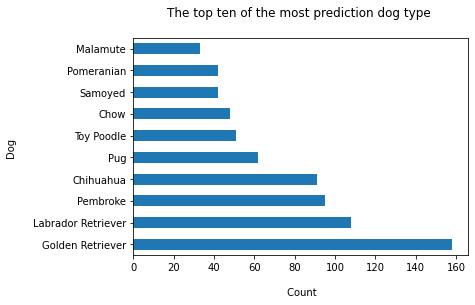

In [59]:
prediction_dog.plot(kind = 'barh')
plt.title('The top ten of the most prediction dog type \n')
plt.xlabel('\n Count')
plt.ylabel('Dog \n')

**From the previous bar chart, I've concluded that Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Pug, Toy Poodle, Chow, Samoyed, Pomeranian, and Malamute are the top ten of the most predicted dog types.**

### Insight and visualization
- The percentage of different dog stages.

In [60]:
dog_stage = df_clean['dog_stage'].value_counts()
dog_stage

pupper     183
doggo       61
puppo       27
floofer      3
Name: dog_stage, dtype: int64

Text(0.5, 1.0, 'The percentage of different dog stages')

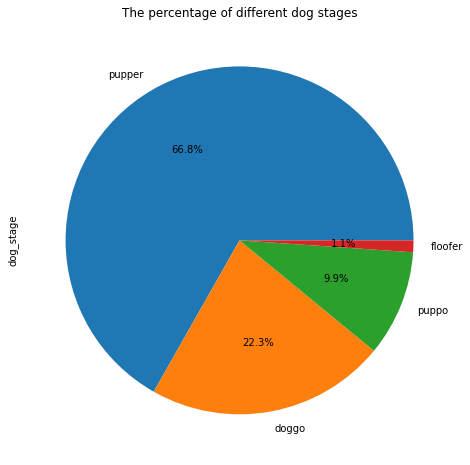

In [61]:
dog_stage.plot(kind='pie', figsize = (8,8), autopct='%1.1f%%')
plt.title("The percentage of different dog stages")

**From the previous pie chart, I've concluded that floofer has the lowest percentage and pupper has the highest percentage.**

### Insight and visualization
- Relationship between favorite count and retweet count.

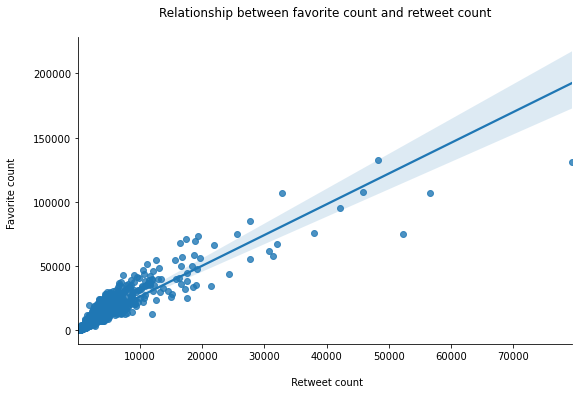

In [62]:
sns.lmplot(x = "retweet_count", 
           y = "favorite_count", 
           data=df_clean,
           aspect = 1.6)
plt.title('Relationship between favorite count and retweet count\n')
plt.xlabel('\n Retweet count')
plt.ylabel('Favorite count \n');

**From the previous scatter plot, I've concluded that the relationship between favorite count and retweet count are linear and positively correlated.**